Problem Statement:
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donorsare supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They arecollaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split
import warnings
warnings.filterwarnings('ignore')

Variable------------>Definition--->Comment
label---->Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	
msisdn---->mobile number of user	
aon--->age on cellular network in days	
daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	
daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	
rental30	Average main account balance over last 30 days	Unsure of given definition
rental90	Average main account balance over last 90 days	Unsure of given definition
last_rech_date_ma	Number of days till last recharge of main account	
last_rech_date_da	Number of days till last recharge of data account	
last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)	
cnt_ma_rech30	Number of times main account got recharged in last 30 days	
fr_ma_rech30	Frequency of main account recharged in last 30 days	Unsure of given definition
sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
cnt_ma_rech90	Number of times main account got recharged in last 90 days	
fr_ma_rech90	Frequency of main account recharged in last 90 days	Unsure of given definition
sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
cnt_da_rech30	Number of times data account got recharged in last 30 days	
fr_da_rech30	Frequency of data account recharged in last 30 days	
cnt_da_rech90	Number of times data account got recharged in last 90 days	
fr_da_rech90	Frequency of data account recharged in last 90 days	
cnt_loans30	Number of loans taken by user in last 30 days	
amnt_loans30	Total amount of loans taken by user in last 30 days	
maxamnt_loans30	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days	
cnt_loans90	Number of loans taken by user in last 90 days	
amnt_loans90	Total amount of loans taken by user in last 90 days	
maxamnt_loans90	maximum amount of loan taken by the user in last 90 days	
medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days	
payback30	Average payback time in days over last 30 days	
payback90	Average payback time in days over last 90 days	
pcircle	telecom circle	
pdate	date	


In [2]:
#Loading the dataset
data=pd.read_csv('Data file.csv',parse_dates=['pdate'])
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
#Checking the columns
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
#Dropping Unnamed column because it has no use in our dataset.
df=data.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
#Checking the shape of the dataset
df.shape

(209593, 36)

In [6]:
#Checking the datatype of the columns
df.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [7]:
#Checking the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

Observation:

1-All the columns are numeric except pcircle,pdate and msisdn.

2-pcircle and msisdn features are object datatype and pdate feature is in datetime datatype.

3-The dataset consist of 209593 rows and 36 columns.

In [8]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

So there are no null value present in our dataset. We can can also see it via visualization with the help of heatmap.

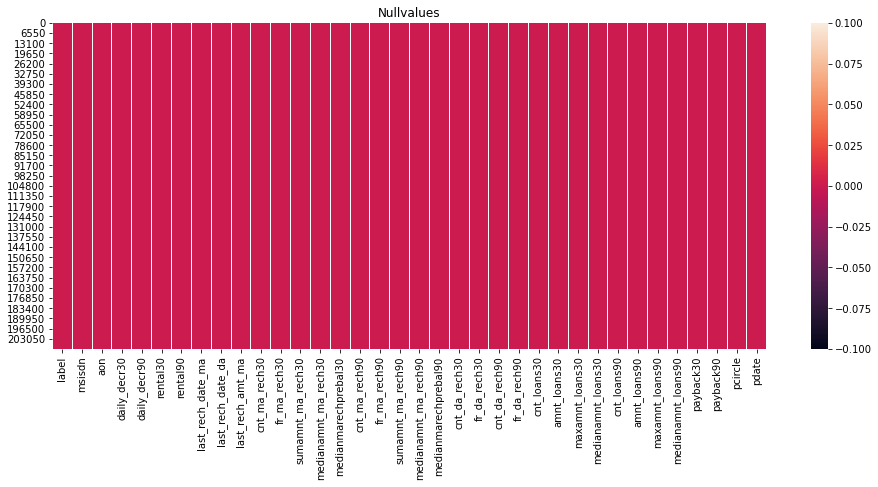

In [9]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

In [10]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
#Here we check the summary of object and datetime columns
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq,first,last
msisdn,209593,186243,04581I85330,7,NaT,NaT
pcircle,209593,1,UPW,209593,NaT,NaT
pdate,209593,82,2016-07-04 00:00:00,3150,2016-06-01,2016-08-21


Observation:
1-Mean is greater than median in all the columns so  data is right skewed.

3-The difference between 75% and maximum is higher that's why outliers are present which needs to be removed.

4-pcircle attribute contains only one unique data which is UPW so we drop this column because it tells that the dataset is only for one area circle.

5-The pdate column tells the date when the data is collect. It contains only three month data.

6-msidn is a mobile number of user and mobile number is unique for every customers. There are only 186243 unique number out of 209593 so rest of the data is duplicates entry so we have to remove those duplicates.

In [12]:
#Deleting the duplicates entry in msidn column
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 36)

In [13]:
#Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
pcircle : ['UPW']


Observation:

Here pcircle column contains only one unique value so we can drop that column because it seems that the dataset have contains only one circle area data. So it doesnt have  any impact in the model if we drop this feature.

In [14]:
#Creating the copy of the dataset.
df1=df.copy()
#Dropping the pcircle column.
df.drop(columns=['pcircle'],axis=1,inplace=True)

In [15]:
#Printing the float datatype columns and number of unique values in the particular columns.

for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())
        print('*******************************************************************************')

aon : 4282
4282
*******************************************************************************
daily_decr30 : 129728
129728
*******************************************************************************
daily_decr90 : 137129
137129
*******************************************************************************
rental30 : 117221
117221
*******************************************************************************
rental90 : 123991
123991
*******************************************************************************
last_rech_date_ma : 1061
1061
*******************************************************************************
last_rech_date_da : 1061
1061
*******************************************************************************
fr_ma_rech30 : 961
961
*******************************************************************************
sumamnt_ma_rech30 : 13130
13130
*******************************************************************************
medianamnt_ma_rech30 : 501
501
**********

In [16]:
#Checking the number of number of defaulter and non defaulter customers.
df['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

In [17]:
#Checking the defaulter customers percentage wise.
df['label'].value_counts(normalize=True) *100

1    86.114914
0    13.885086
Name: label, dtype: float64

Observation:

After seeing the label column which is also our target feature for this dataset it is clearly shown that 86.11% of
data is label 1 and only 13.8% of data is label 0 so our dataset is implanced. So before making the ML model first we
have to do sampling to get rid off imblance dataset.

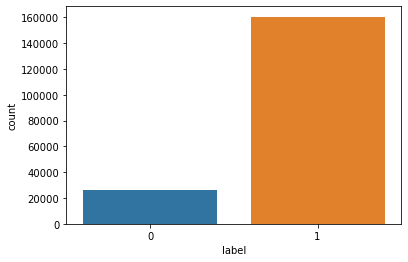

In [18]:
sns.countplot(df['label'])
plt.show()


In [19]:
df_cor = df.corr()
df_cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,...,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,...,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,...,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,...,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,...,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,...,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,...,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,...,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,...,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,...,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


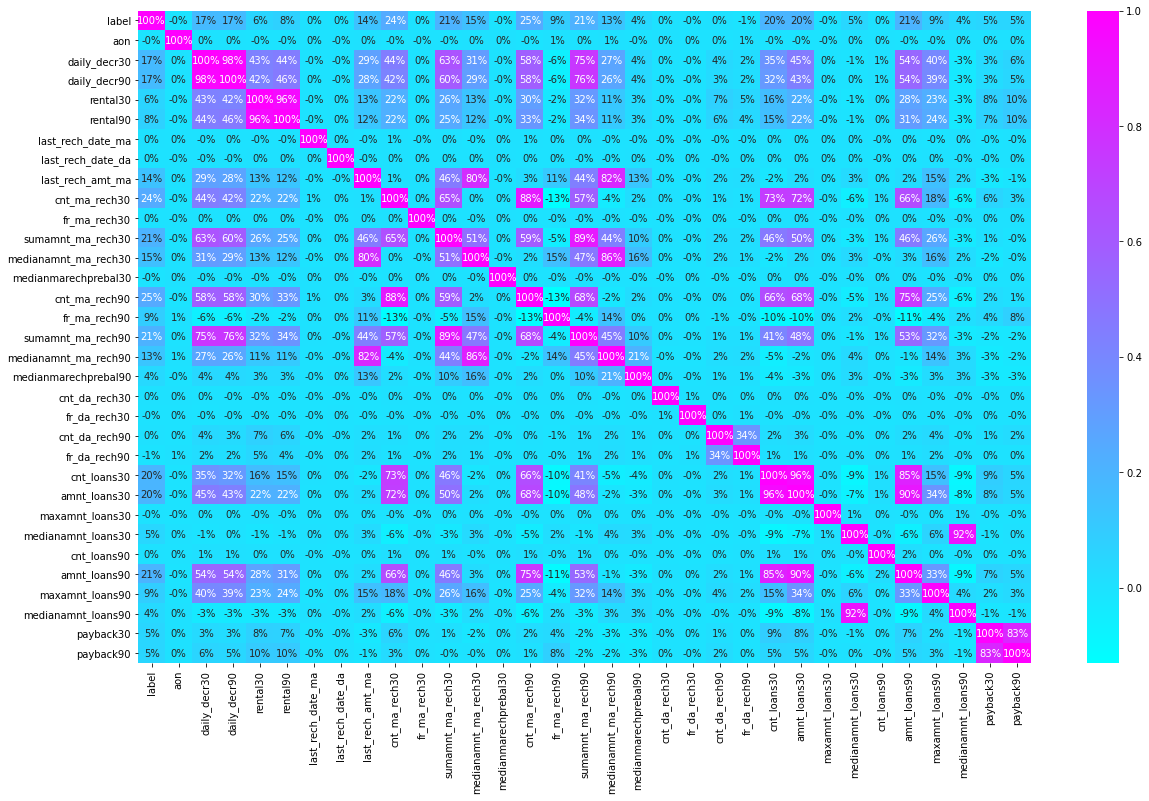

In [20]:
#Seeing the correlation via visualization
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:

1-daily_decr30 and daily_decr90 features are highly correlated with each otheer.

2-rental30 and rental90 features are highly correlated with each other.

3-cnt_loans30 and amount_loans30 columns are highly correlated with each other.

4-amount_loans30 is also highly correlated with amount_loans90 column.

5-medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.

6-We have to drop one of the features which are highly correlated with other feayures. And if we dont do this then our
  model will face multicolinearity problem.

In [21]:
#Now checking the shape
df.shape

(186243, 35)

In [22]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

In [23]:
#Now checking the shape
df.shape

(186243, 31)

In [24]:
#Checking the unique value in pdate column.
df['pdate'].nunique()

82

In [25]:
#Making the new column Day, Month and year from pdate column
df['Day']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['Month']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['Year']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [26]:
df.head(2)

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,21408I70789,272.0,3065.15,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.0,29.0,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12124.75,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.0,0.0,2016-08-10,10,8,2016


In [27]:
#After fetching the data from pdate column now we are going to drop it because it has not any significant role.
df.drop(columns=['pdate'],axis=1, inplace = True)

In [28]:
#Seprate the categorical columns and Numerical columns
cat_df=[]
num_df=[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 33
>>> Number of categorical features:: 1
>>> Number of Numerical Feature:: 32


Text(0.5, 1.0, 'Correlation with target Variable that is label column')

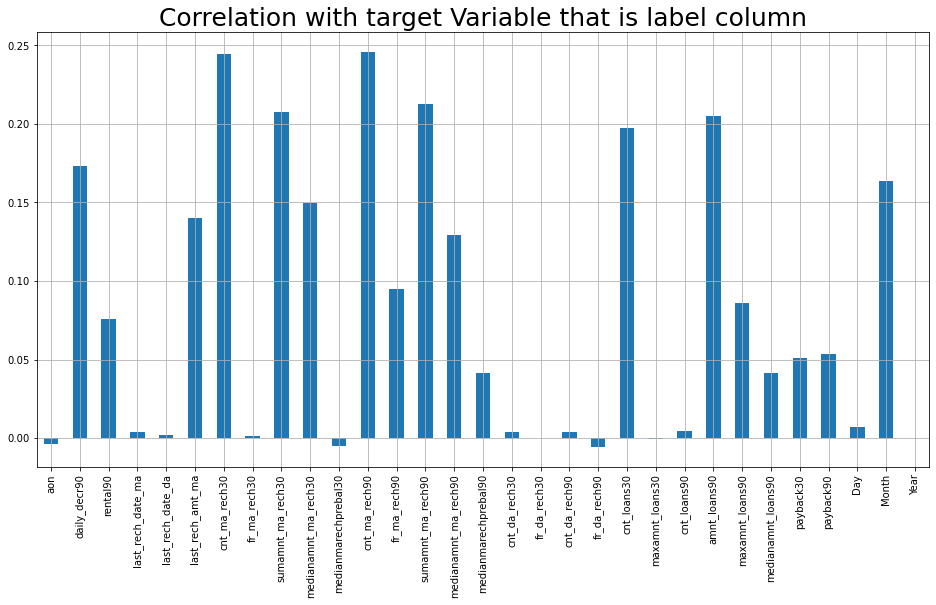

In [29]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

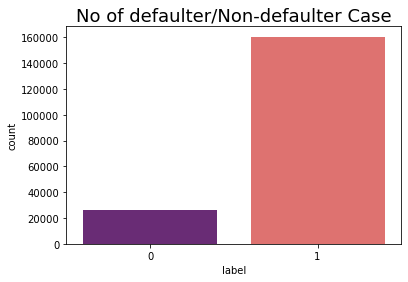

1    160383
0     25860
Name: label, dtype: int64


In [30]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

Observation:

Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not been payed i.e. defaulter.

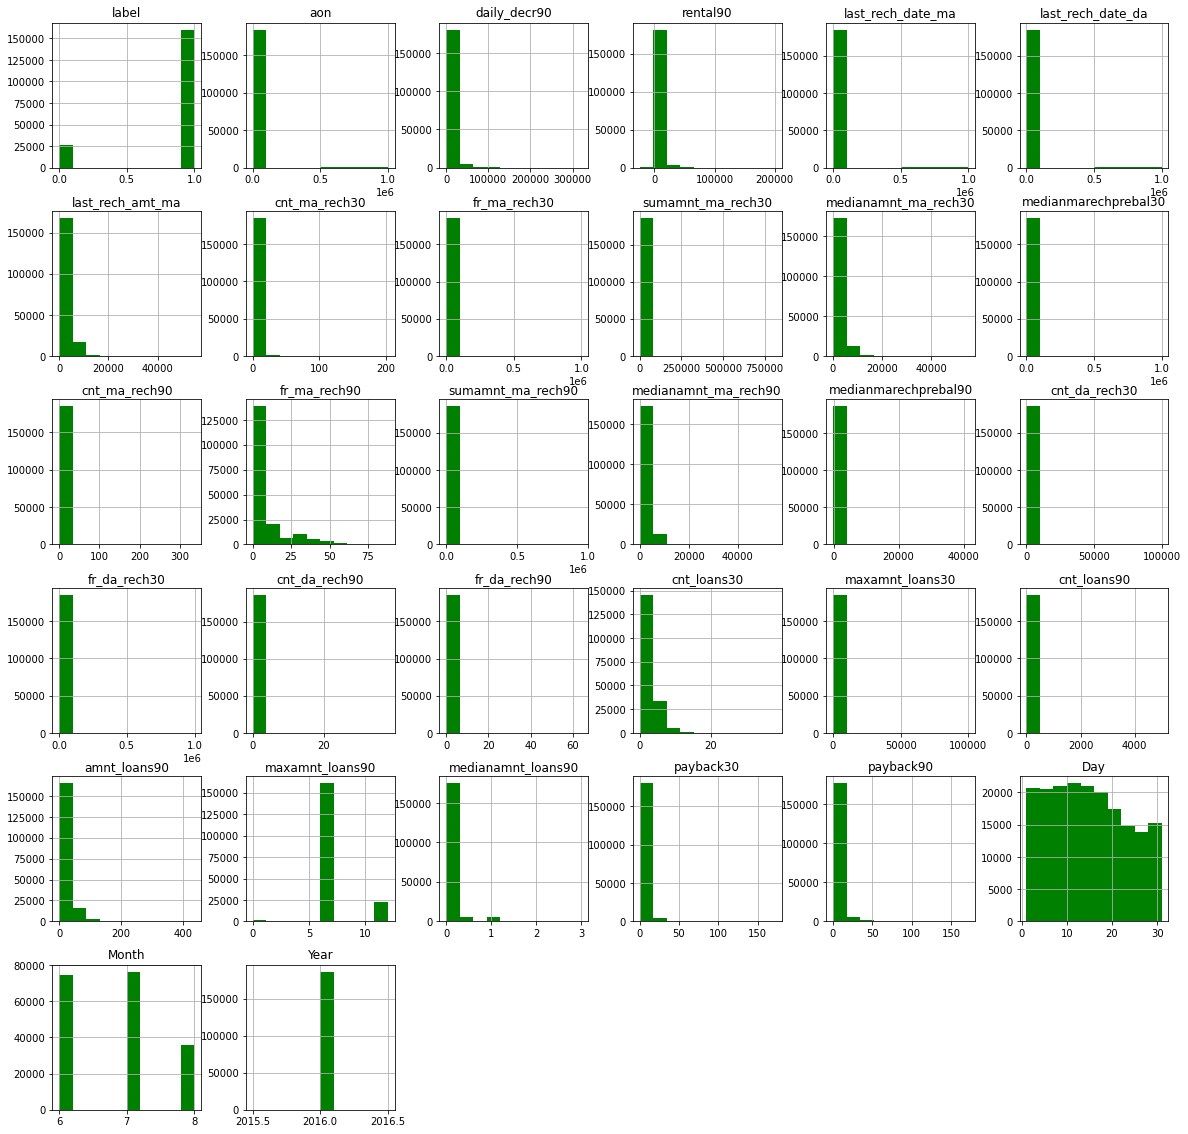

In [31]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='g')
plt.show()

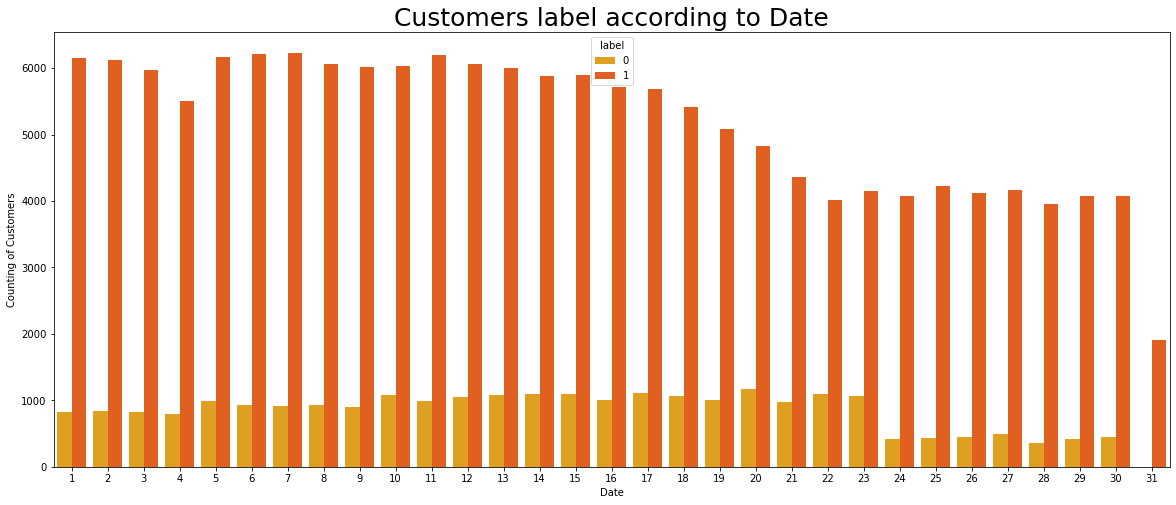

In [32]:
#Customer label according to Date
plt.figure(figsize=(20,8))
sns.countplot(x="Day", hue='label', data=df, palette='autumn_r')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

Observation:

1-The above figure which is date vs label shows that the customers who did not pay their loans are from date 10 to 23.

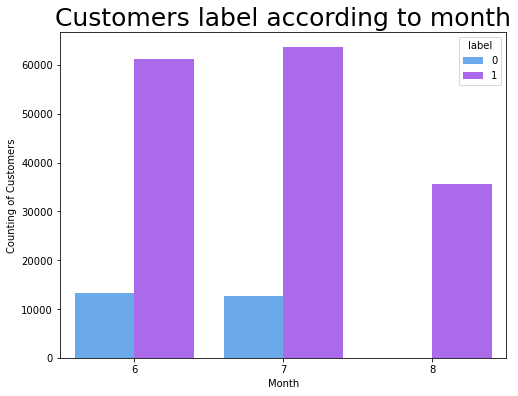

In [33]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="Month", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

Observation:
There are severals customers at June and July month who did not pay their loan.

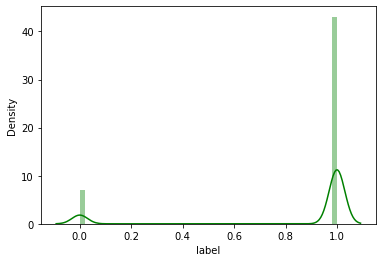

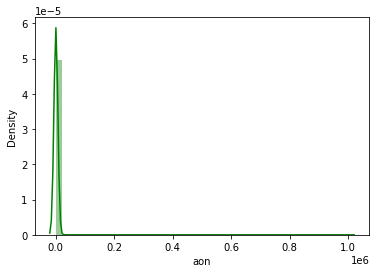

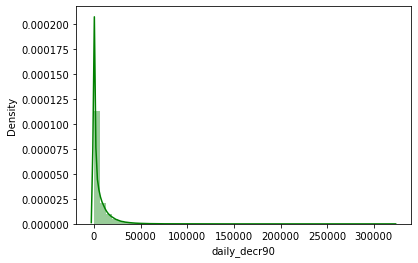

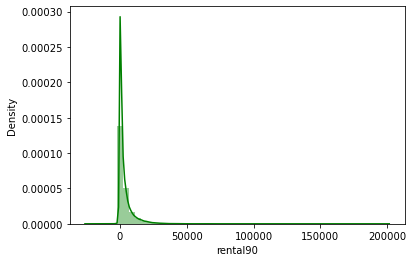

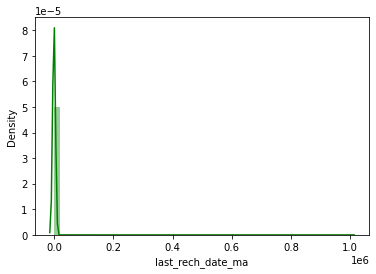

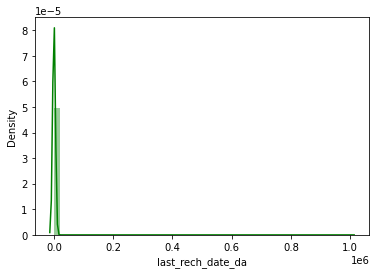

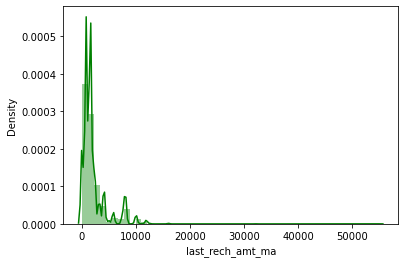

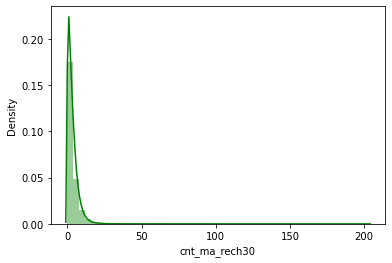

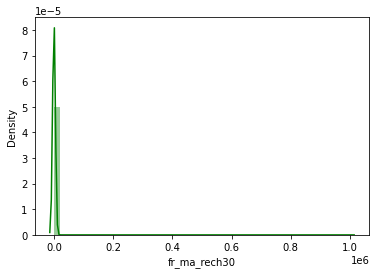

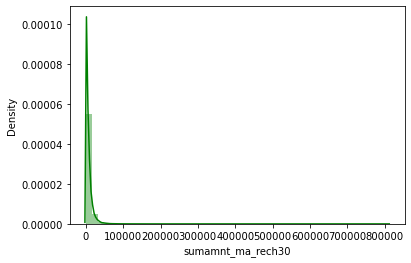

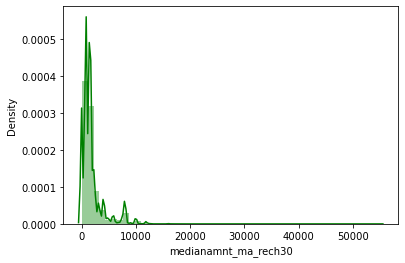

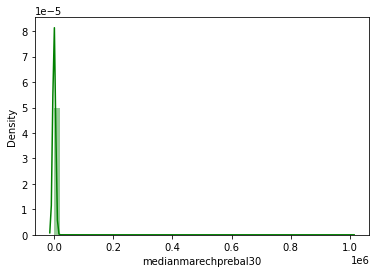

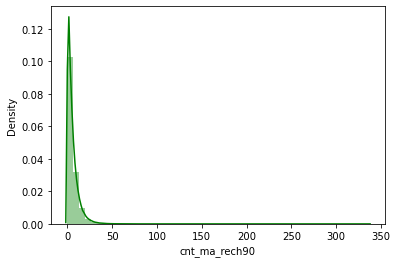

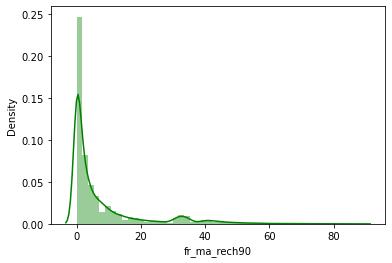

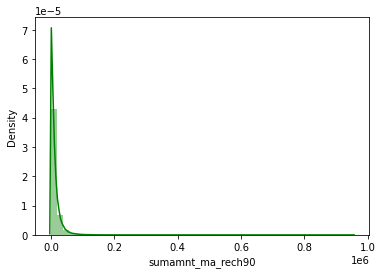

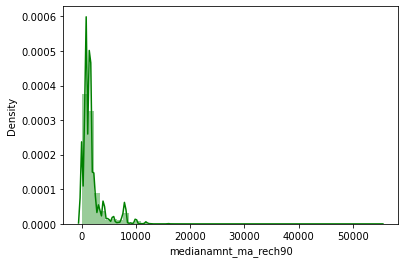

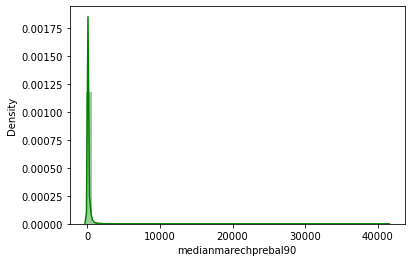

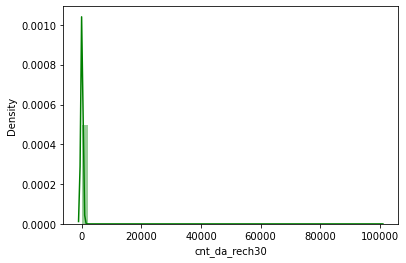

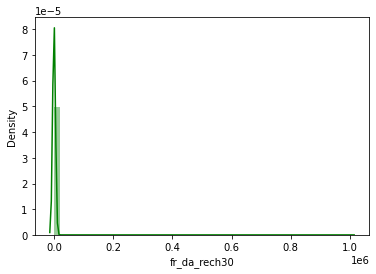

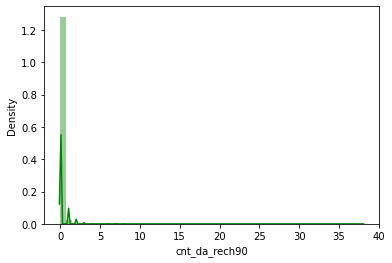

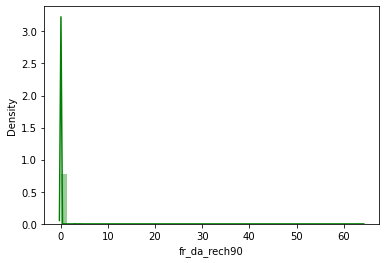

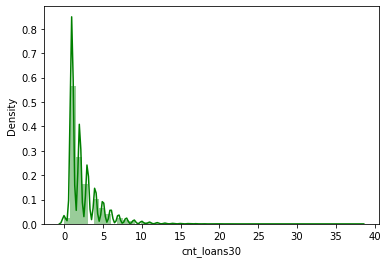

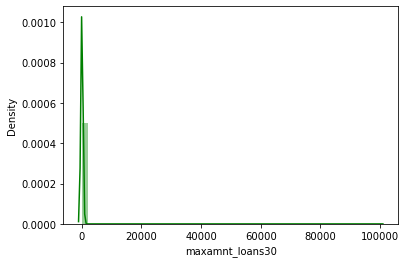

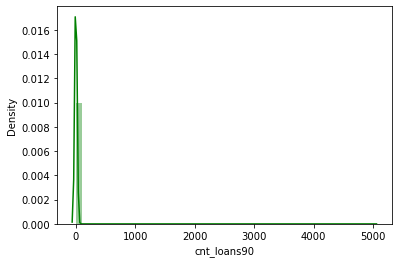

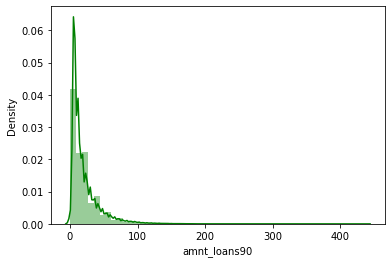

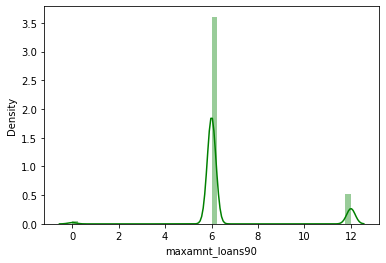

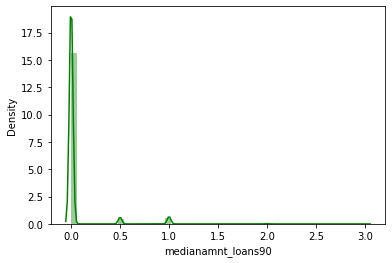

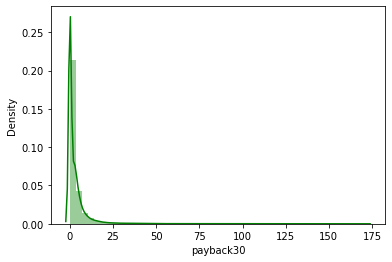

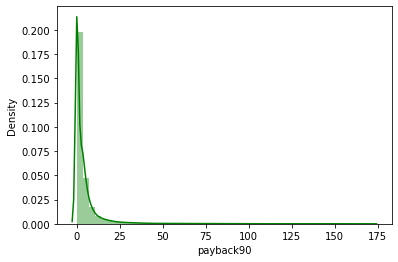

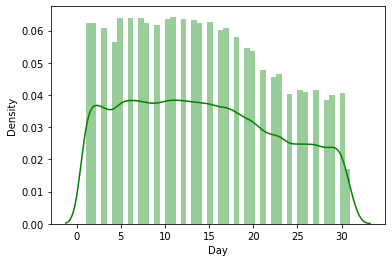

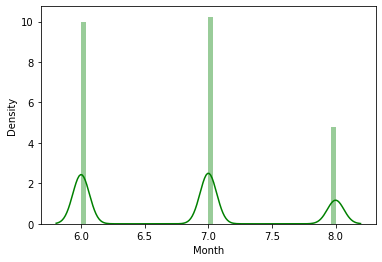

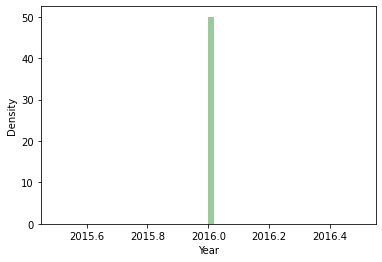

In [34]:
for col in df.describe().columns:
    sns.distplot(df[col],color='g')
    plt.show()

### checking skewness

In [35]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr90             4.301490
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
maxamnt_loans30         17.718074
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans90          1.650198
medianamnt_loans90       4.774958
payback30                8.193009
payback90                6.763241
Day           

Note:

Most of the columns is skewed which we handel it via scaling because if we remove skewness via log method or boxcox
then NaN value occures in these columns.

### checking outliers

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

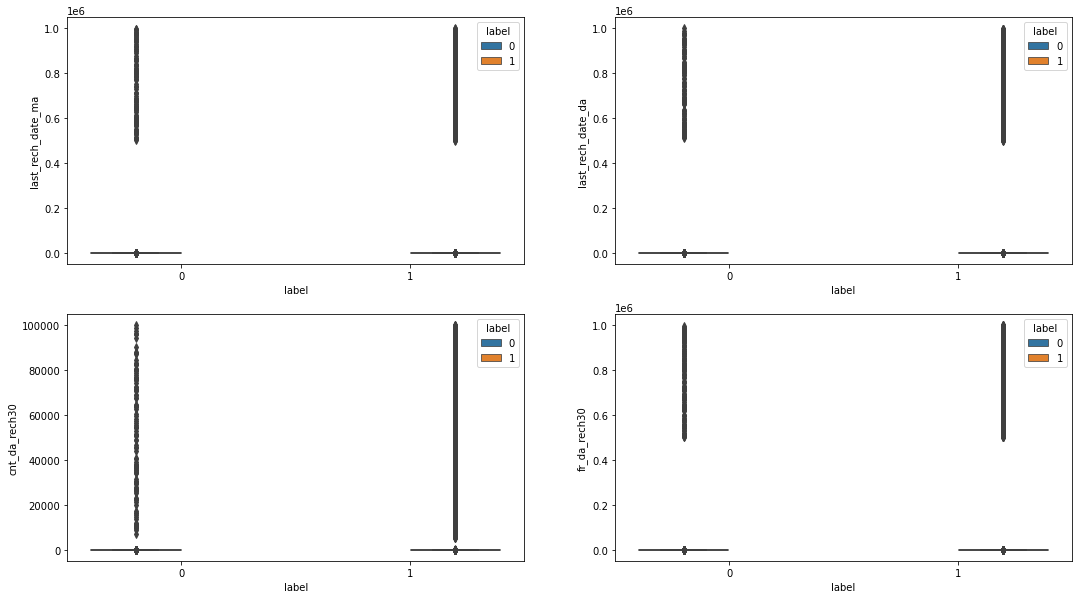

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'label', y = 'last_rech_date_ma', hue = 'label', data = df)
sns.boxplot(ax=ax2, x = 'label', y = 'last_rech_date_da', hue = 'label', data = df)
sns.boxplot(ax=ax3, x = 'label', y = 'cnt_da_rech30', hue = 'label', data = df)
sns.boxplot(ax=ax4, x = 'label', y = 'fr_da_rech30', hue = 'label', data = df)

Observation:

There are too many outliers present in our dataset.So we need to remove it. But before removing please check that 
only 8 to 10% of data removed.

In [37]:
#Creating a copy of our dataset
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [38]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

#### removing outliers with zscore

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[2.49037591, 0.10377791, 0.22775491, ..., 0.234897  , 2.83579276,
        2.32325254],
       [0.40154581, 0.09797818, 0.80746584, ..., 0.234897  , 0.37055804,
        0.40750695],
       [0.40154581, 0.10031125, 0.41694891, ..., 0.234897  , 0.37055804,
        0.40750695],
       ...,
       [0.40154581, 0.10203799, 0.55922577, ..., 0.234897  , 0.25999422,
        0.31334283],
       [0.40154581, 0.08453335, 0.84928003, ..., 0.234897  , 0.37055804,
        0.58121631],
       [0.40154581, 0.08652371, 0.06399206, ..., 0.234897  , 0.37055804,
        0.40750695]])

In [40]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 186234, 186239, 186239], dtype=int64), array([15, 15, 32, ...,  3, 26, 30], dtype=int64))


In [41]:
df1_new=df1[(z<3).all(axis=1)]

In [42]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(186243, 33) 		 (143188, 33)


So if we remove outliers 23% of our data is removed as a outliers. So we are not going to remove outliers.

#### Converting the categorical data into numeric variables

In [43]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [44]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
0,0,40191,272.0,3065.150000,260.13,2.0,0.0,14,2,21.0,...,6.0,2.0,2,1,0.0,29.000000,29.000000,19,1,0
1,1,142291,712.0,12124.750000,3691.26,20.0,0.0,38,1,0.0,...,12.0,1.0,2,2,0.0,0.000000,0.000000,9,2,0
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,6.0,1.0,1,1,0.0,0.000000,0.000000,18,2,0
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,6.0,2.0,2,1,0.0,0.000000,0.000000,5,0,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,6.0,7.0,7,1,0.0,2.333333,2.333333,21,0,0


In [45]:
#Splitting the data into x and y
x = df.drop(['label'], axis=1)
y = df['label']

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 160383, 0: 25860})
Resample dataset shape Counter({0: 160383, 1: 160383})


In [47]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_smote)

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_scaled,y_smote)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[0.03263055 0.02878896 0.09616169 0.03316001 0.02497522 0.00260354
 0.04092829 0.05705622 0.01054864 0.03043269 0.0196323  0.01291286
 0.07077921 0.02365826 0.08535125 0.02090672 0.0177533  0.00186786
 0.0009809  0.00263703 0.00064763 0.05693747 0.01098281 0.03402252
 0.05242447 0.00967014 0.01787567 0.01590846 0.01421814 0.06287869
 0.11066851 0.        ]


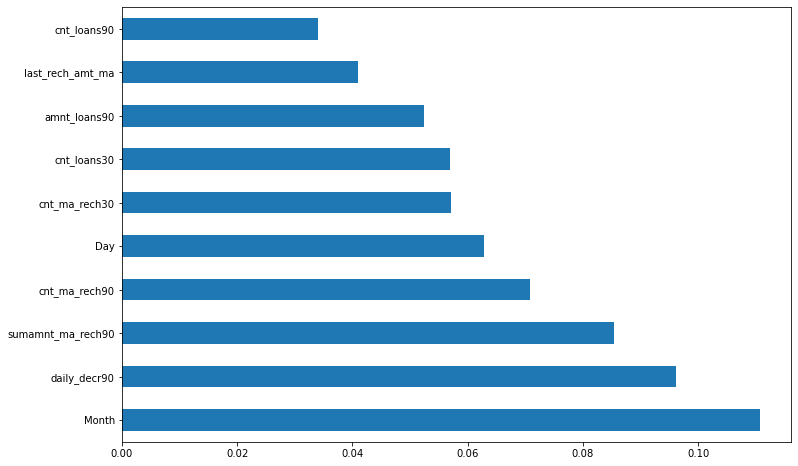

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

By looking at the daily_decr90,month which is Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)and monthly wise, it seems that this feature helps to discriminate the data indeed. This feature can bring insights for company when analyzing a customers.

In [51]:
# checking for best random state

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.7744797029843273 on Random State:  171


In [52]:
# creating train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size=0.3, random_state=171)

### DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,preddt)*100))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt,target_names=target_names,))

Accuracy Score: 89.8129481450691
[[43346  4649]
 [ 5154 43081]]
              precision    recall  f1-score   support

     class 0       0.89      0.90      0.90     47995
     class 1       0.90      0.89      0.90     48235

    accuracy                           0.90     96230
   macro avg       0.90      0.90      0.90     96230
weighted avg       0.90      0.90      0.90     96230



### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,predrf)*100))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,target_names=target_names))

Accuracy Score: 94.02888911981711
[[44656  3339]
 [ 2407 45828]]
              precision    recall  f1-score   support

     class 0       0.95      0.93      0.94     47995
     class 1       0.93      0.95      0.94     48235

    accuracy                           0.94     96230
   macro avg       0.94      0.94      0.94     96230
weighted avg       0.94      0.94      0.94     96230



##### K nearest neighbors

In [55]:
# By using K nearest neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predknn)*100))
target_names = ['class 0','class 1']
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn,target_names=target_names))

Accuracy Score: 85.44424815546088
[[43673  4322]
 [ 9685 38550]]
              precision    recall  f1-score   support

     class 0       0.82      0.91      0.86     47995
     class 1       0.90      0.80      0.85     48235

    accuracy                           0.85     96230
   macro avg       0.86      0.85      0.85     96230
weighted avg       0.86      0.85      0.85     96230



#### Naive Bayes

In [56]:
# By using Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test, predgnb)*100))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb,target_names=target_names))

Accuracy Score: 72.4389483529045
[[43004  4991]
 [21531 26704]]
              precision    recall  f1-score   support

     class 0       0.67      0.90      0.76     47995
     class 1       0.84      0.55      0.67     48235

    accuracy                           0.72     96230
   macro avg       0.75      0.72      0.72     96230
weighted avg       0.75      0.72      0.72     96230



In [57]:
# checking cross validation score

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

maxx_acc = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result = cv.mean()
    print('{}: {}'.format(name, result))
    if result > maxx_acc:
        maxx_acc = result
        b_model = name
print("The best model is {} with the accuracy {:.2f}".format(b_model, maxx_acc))

Naive Bayes: 0.7226369354000399
Decision Tree: 0.8944000111218735
Random Forest: 0.9377560841033729
KNN: 0.8491021540711838
The best model is Random Forest with the accuracy 0.94


### Hyperparameter tuning using grid searchcv

In [60]:
max_depth = [5, 8, 15]
criterion = ['gini', 'entropy']

hyperF = dict( max_depth = max_depth,  criterion = criterion)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.4min finished


In [61]:
bestF.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [62]:
mod = RandomForestClassifier( max_depth=15, criterion ='gini',random_state=63)
mod.fit(x_train, y_train)
prediction = mod.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, prediction)))

Accuracy Score: 0.9120128857944508


In [63]:
predictions1 = pd.DataFrame({'predictions': prediction, 'Real Values': y_test})
predictions1

,predictions,Real Values
312479,1,0
76978,0,0
53657,1,1
89873,1,1
69910,1,1
...,...,...
64416,1,0
286885,0,0
134683,0,0
209115,0,0


### Plotting ROC AUC curve

In [65]:
# predicting probabilities
pred_prob1 = gnb.predict_proba(x_test)
pred_prob2 = dt.predict_proba(x_test)
pred_prob3 = knn.predict_proba(x_test)
pred_prob4 = rf.predict_proba(x_test)

In [66]:
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr=fpr
random_prob = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [67]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8297058719954729 0.8981419361293002 0.9152026832638541 0.9849462040879595


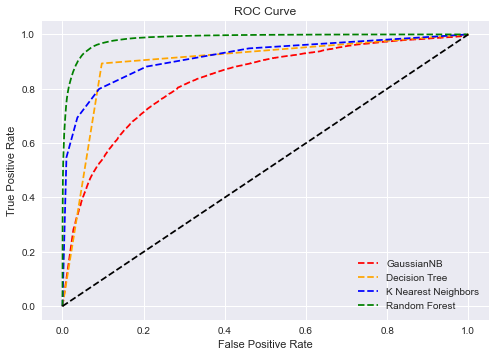

In [68]:
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='K Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr, tpr, linestyle='--', color='black')

#title
plt.title('ROC Curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [69]:
### Saving the model

In [70]:
import joblib
joblib.dump(mod, 'Microcreditloandefaulter.pkl')

['Microcreditloandefaulter.pkl']

In [71]:
### loading the model

In [72]:
model = joblib.load('Microcreditloandefaulter.pkl')
pred = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.9120128857944508
